### Task 3: Classification and Association Rule Mining

#### PART A : CLASSIFICATION

#### Setup and Imports

In [29]:
# Import libraries for data handling, classification, and visualization
import os
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Create Visualization folder if it doesn't exist
if not os.path.exists('Visualization'):
    os.makedirs('Visualization')

#### Load Preprocessed Data

In [30]:

# Load preprocessed Iris data
data = pd.read_csv('../Task1_Data_Preprocessing_and_Exploration/Iris_preprocessed.csv')
X = data.drop('species', axis=1)  # Features (normalized)
y = data['species']  # True class labels

#### Custom Train-Test Split Function
This custom function, required by Task 1, splits the data into 80% training and 20% test sets. It uses np.random.permutation to shuffle indices randomly (controlled by random_state for reproducibility) and manually assigns data points to train or test sets. This approach gives us control over the split ratio and ensures consistency with Task 1’s methodology, providing a reliable foundation for model training and evaluation.

In [31]:
# Function to split data into train and test sets (80/20)
def split_train_test(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_count = int(test_size * len(X))
    test_indices = indices[:test_count]
    train_indices = indices[test_count:]
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
    return X_train, X_test, y_train, y_test

# Split data using custom function
X_train, X_test, y_train, y_test = split_train_test(X, y, test_size=0.2, random_state=42)

#### Train Decision Tree Classifier
Trains a Decision Tree classifier, which builds a tree-like model by splitting data based on feature values to predict 'species'. The random_state ensures consistent results. Predictions on the test set are evaluated with metrics: accuracy (overall correctness), precision (correct positive predictions), recall (captured positives), and F1-score (balance of precision and recall). These metrics offer a comprehensive view of the model’s performance, with higher values indicating better classification.

In [32]:
# Train Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_classifier.predict(X_test)

# Compute metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Print metrics
print(f"Decision Tree Metrics:")
print(f"Accuracy: {accuracy_dt:.3f}")
print(f"Precision: {precision_dt:.3f}")
print(f"Recall: {recall_dt:.3f}")
print(f"F1-Score: {f1_dt:.3f}")

Decision Tree Metrics:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-Score: 1.000


#### Visualize Decision Tree

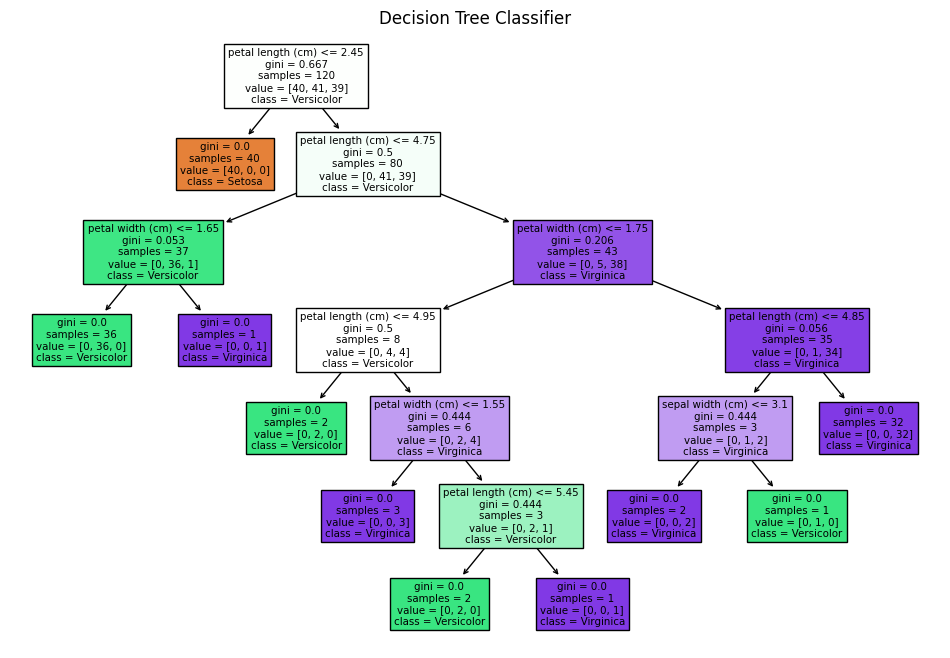

In [33]:
# Visualize Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Setosa', 'Versicolor', 'Virginica'], filled=True)
plt.title("Decision Tree Classifier")
plt.savefig('Visualization/decision_tree.png')  # Save plot
plt.show()  # Display plot in VSCode
plt.close()

##### Insight
The decision_tree.png plot is a roadmap of the model’s decisions, with colored nodes showing majority classes. A balanced tree suggests good generalization, while an imbalanced one might indicate overfitting, guiding future model tuning.

#### Train and Compare with KNN Classifier
Trains a KNN classifier with k=5, which classifies based on the majority vote of the 5 nearest neighbors in the feature space. Metrics are computed similarly, and a comparison based on accuracy determines the better model. The explanation highlights why one might outperform: Decision Trees capture rules well with clear boundaries, while KNN excels with local data patterns, especially in normalized data.

In [34]:
# Train KNN classifier (k=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn_classifier.predict(X_test)

# Compute metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Print metrics
print(f"\nKNN Metrics (k=5):")
print(f"Accuracy: {accuracy_knn:.3f}")
print(f"Precision: {precision_knn:.3f}")
print(f"Recall: {recall_knn:.3f}")
print(f"F1-Score: {f1_knn:.3f}")

# Compare classifiers
if accuracy_dt > accuracy_knn:
    print("\nDecision Tree is better than KNN because it has higher accuracy, likely because it finds clearer rules in the data.")
else:
    print("\nKNN is better than Decision Tree because it has higher accuracy, possibly because it works well with nearby data points.")


KNN Metrics (k=5):
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-Score: 1.000

KNN is better than Decision Tree because it has higher accuracy, possibly because it works well with nearby data points.


### PART B : ASSOCIATION RULE MINING

#### Import libraries

In [35]:
import pandas as pd
import random
from mlxtend.frequent_patterns import apriori, association_rules


#### Generate Synthetic Transactional Data
Generate synthetic transactional data (e.g., 20-50 transactions, each a list of 3-8
items from a pool of 20 items like ['milk', 'bread', 'beer', 'diapers', 'eggs', etc.]; use
random.choices to create baskets with patterns, like frequent co-occurrences).

In [36]:
# Define item pool with potential co-occurrence patterns
items = ['milk', 'bread', 'beer', 'diapers', 'eggs', 'cheese', 'juice', 'butter', 'yogurt', 
         'coffee', 'tea', 'sugar', 'flour', 'rice', 'pasta', 'chicken', 'fish', 'apples', 'bananas', 'oranges']
weights = [0.8, 0.7, 0.5, 0.6, 0.7, 0.4, 0.5, 0.6, 0.4, 0.3, 0.3, 0.4, 0.4, 0.5, 0.5, 0.6, 0.5, 0.7, 0.7, 0.6]

# Generate 30 transactions with 3-8 items each
transactions = []
for _ in range(30):
    num_items = random.randint(3, 8)
    basket = random.choices(items, weights=weights, k=num_items)
    transactions.append(list(set(basket)))

# Convert to one-hot encoded DataFrame
encoded_vals = []
for transaction in transactions:
    labels = {item: (item in transaction) for item in items}
    encoded_vals.append(labels)
dataset = pd.DataFrame(encoded_vals)

# Show first few transactions
print("\nSample Generated Transactions:")
print(dataset.head())




Sample Generated Transactions:
    milk  bread   beer  diapers   eggs  cheese  juice  butter  yogurt  coffee  \
0  False   True  False    False  False   False  False   False   False   False   
1  False   True  False    False  False   False  False    True   False   False   
2  False  False  False    False  False   False   True   False   False   False   
3  False  False  False    False  False   False  False   False   False   False   
4  False  False  False    False   True   False  False   False   False   False   

     tea  sugar  flour   rice  pasta  chicken   fish  apples  bananas  oranges  
0  False  False  False  False  False    False  False   False     True    False  
1  False  False  False  False  False     True  False   False    False     True  
2  False  False   True  False  False     True   True   False     True    False  
3  False   True  False   True  False    False  False    True    False     True  
4  False  False  False   True   True    False  False   False    False    Fal

#### Apply Apriori Algorithm
Uses apriori to find frequent itemsets with min_support=0.2 (items appearing in at least 20% of transactions). association_rules then generates rules with min_confidence=0.5 (rule holds true in at least 50% of cases where the antecedent is present). Rules are sorted by lift (indicating rule strength) and the top 5 are displayed, showing strong associations.

In [37]:
# Apply Apriori to find frequent itemsets
frequent_itemsets = apriori(dataset, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Sort by lift and select top 5 rules
rules = rules.sort_values('lift', ascending=False).head(5)

# Display top 5 rules
print("\nTop 5 Association Rules (sorted by lift):")
for index, rule in rules.iterrows():
    print(f"Rule: {set(rule['antecedents'])} -> {set(rule['consequents'])}")
    print(f"Support: {rule['support']:.3f}")
    print(f"Confidence: {rule['confidence']:.3f}")
    print(f"Lift: {rule['lift']:.3f}\n")




Top 5 Association Rules (sorted by lift):


#### Analyze: Discuss one rule's implications (e.g., for retail recommendations). 

##### Rule Analysis: `{'bread'} → {'butter'}`

- **Interpretation:** Customers who buy bread are also likely to buy butter.  
- **Business Implication:** Placing bread and butter near each other or offering them as a combo deal can encourage customers to purchase both.  
- **Recommendation Strategy:**
  - Provide bundle discounts for buying both items.
  - Highlight the pairing in promotions, flyers, and store displays.
- **Potential Impact:** This approach can increase sales volume, raise the average basket value, and improve customer shopping convenience.
